In [2]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import re
from sklearn import preprocessing 

In [103]:
data = pd.read_csv('../../data/cancer_data_v3.csv')

In [104]:
Age_group = data['Age'].apply(lambda x: 'Y' if x<52 else 'O' if x>68 else 'M') # Young, Old, Middle

In [105]:
data.insert(5,'Age_group',Age_group)

In [10]:
data

,ID,"A=Case, B=Control",Origin,A=male B=female,Pattern,Age_group,Age,Smoke,RBC,HGB,...,TG,TCH,HDL-C,LDL-C,ALP,GGT,CK,LDH-L,HBDH,T-CEA
0,1,A,A,B,A,Y,41,0.0,3.78,122.0,...,0.53,3.86,1.99,1.67,47.0,11.0,38.0,156.0,118.0,NaN
1,100,A,A,A,A,Y,35,0.0,5.53,169.0,...,1.23,6.60,2.49,3.85,43.0,30.0,23.0,191.0,159.0,NaN
2,1000,A,A,A,A,Y,50,0.0,4.04,120.0,...,0.93,4.22,1.12,2.96,66.0,17.0,60.0,211.0,166.0,3.33
3,1007,A,A,B,A,Y,50,200.0,4.14,131.0,...,1.76,3.97,1.47,2.20,58.0,13.0,64.0,227.0,173.0,0.76
4,1008,A,A,A,A,Y,51,400.0,4.54,139.0,...,1.27,3.55,1.10,2.13,88.0,31.0,51.0,159.0,146.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7787,2489054,B,C,A,O,M,60,25.0,4.96,161.0,...,1.82,5.39,1.35,3.40,94.0,49.0,96.0,159.0,119.0,1.34
7788,2491728,B,C,A,O,Y,48,0.0,5.35,174.0,...,0.97,5.22,1.11,3.71,60.0,65.0,76.0,164.0,129.0,0.97
7789,2491799,B,C,A,O,M,56,0.0,6.36,129.0,...,1.19,5.91,1.39,4.03,124.0,16.0,38.0,128.0,112.0,1.38
7790,509610,B,C,B,O,M,59,25.0,5.03,147.0,...,0.71,5.39,1.83,2.88,71.0,28.0,129.0,273.0,232.0,3.88


#### HCT 表示的是百分率，移除1以上的错误值

In [119]:
data['HCT'] = data['HCT'].apply(lambda x: np.nan if x>1 else x)

In [125]:
for fea in data.columns[7:]:
    median = data.groupby(['Origin', 'Age_group', 'A=male B=female'])[fea].median()
    data.set_index(['Origin', 'Age_group', 'A=male B=female'], inplace=True)
    data[fea].fillna(median, inplace=True)
    data.reset_index(inplace=True)

# PCA:保留RDW

In [154]:
feature = ['Age', 'Smoke', 'RBC', 'HGB', 'HCT', 'MCV ', 'MCH', 'MCHC ',
       'RDW-CV', 'RDW-SD', 'PLT', 'WBC', 'NEUT%', 'LYM%', 'EO%', 'BASO%',
       'NEUT', 'LYMPH', 'MONO', 'EO', 'BASO', 'TBIL', 'DBIL', 'IBIL', 'ALT',
       'AST', 'AST:ALT', 'TP', 'ALB', 'GLO', 'GLU', 'A/G', 'BUN', 'Cr',
       'Cystatin-C', 'UA', 'TG', 'TCH', 'HDL-C', 'LDL-C', 'ALP', 'GGT', 'CK',
       'LDH-L', 'HBDH', 'T-CEA', 'MONO%']
data2 =data.dropna()
pca = PCA(n_components=4)
data_pca = pca.fit_transform(data2[feature])
data_pca = pd.DataFrame(data_pca, columns=[f"PC{i + 1}" for i in range(data_pca.shape[1])], index=data2.index)

In [155]:
data_pca

,PC1,PC2,PC3,PC4
0,-223.711871,60.597792,-93.293819,-56.192167
1,-221.827962,106.186588,102.484709,-6.273869
2,-223.419581,26.765290,-84.109969,23.694435
3,-23.347224,51.726697,-40.274538,37.688871
4,176.278978,56.361339,-129.801157,-31.764603
...,...,...,...,...
7787,-201.755456,-113.240799,-11.639065,-32.631990
7788,-224.875494,45.016475,-42.634643,-30.352992
7789,-223.969476,39.609832,2.480793,-73.275054
7790,-200.027426,37.605216,-140.655392,124.922655


In [137]:
data3 = pd.concat([data2, data_pca], axis=1)

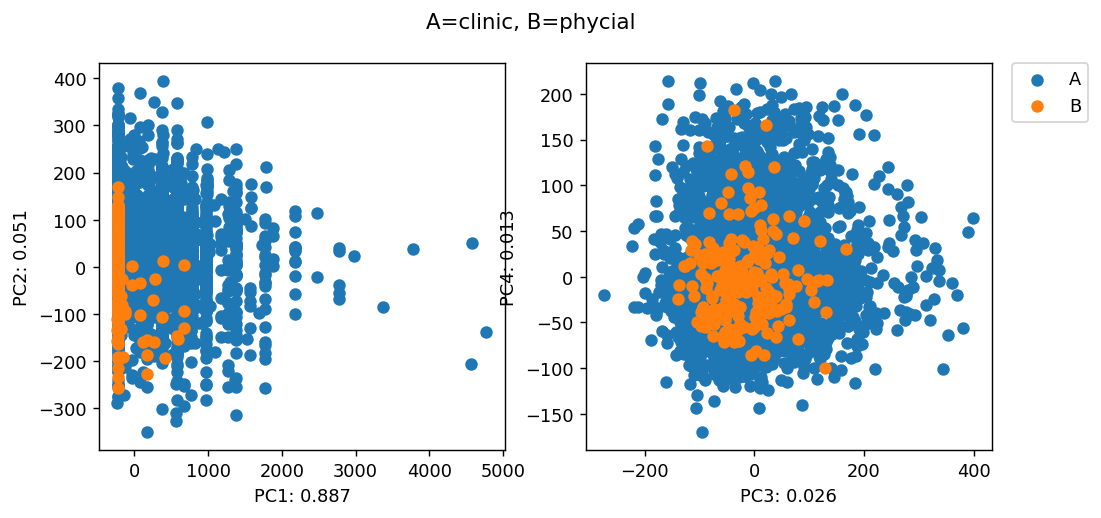

In [151]:
fig = plt.figure(dpi=128, figsize=(9, 4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.scatter(data3[data3['Origin']=='A']['PC1'], data3[data3['Origin']=='A']['PC2'])
ax1.scatter(data3[data3['Origin']=='B']['PC1'], data3[data3['Origin']=='B']['PC2'])
ax2.scatter(data3[data3['Origin']=='A']['PC3'], data3[data3['Origin']=='A']['PC4'])
ax2.scatter(data3[data3['Origin']=='B']['PC3'], data3[data3['Origin']=='B']['PC4'])

ax1.set_xlabel("PC1: %0.3f" % pca.explained_variance_ratio_[0])
ax1.set_ylabel("PC2: %0.3f" % pca.explained_variance_ratio_[1])
ax2.set_xlabel("PC3: %0.3f" % pca.explained_variance_ratio_[2])
ax2.set_ylabel("PC4: %0.3f" % pca.explained_variance_ratio_[3])

fig.suptitle('A=clinic, B=phycial')
plt.legend(['A','B'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

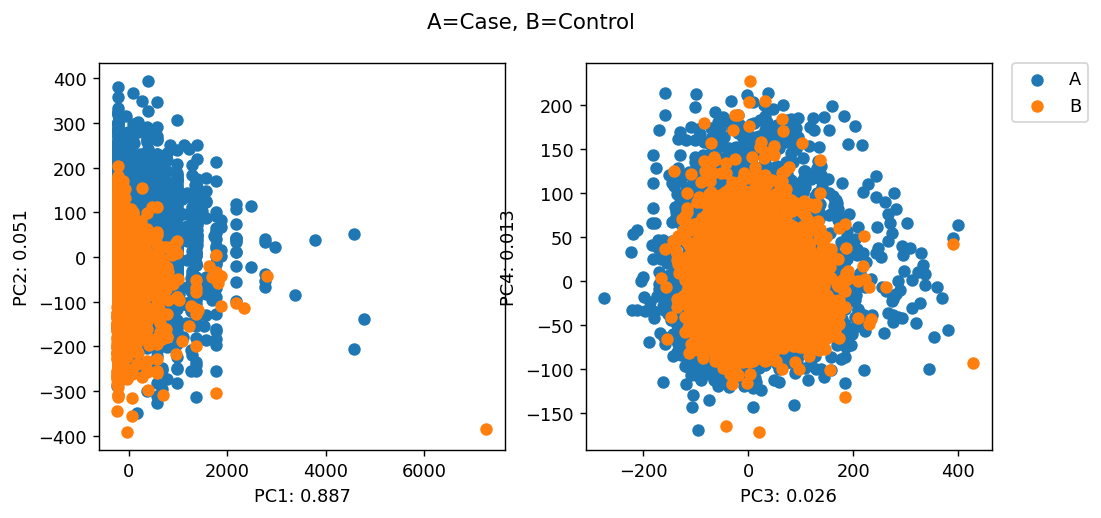

In [146]:
fig = plt.figure(dpi=128, figsize=(9, 4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.scatter(data3[data3['A=Case, B=Control']=='A']['PC1'], data3[data3['A=Case, B=Control']=='A']['PC2'])
ax1.scatter(data3[data3['A=Case, B=Control']=='B']['PC1'], data3[data3['A=Case, B=Control']=='B']['PC2'])
ax2.scatter(data3[data3['A=Case, B=Control']=='A']['PC3'], data3[data3['A=Case, B=Control']=='A']['PC4'])
ax2.scatter(data3[data3['A=Case, B=Control']=='B']['PC3'], data3[data3['A=Case, B=Control']=='B']['PC4'])

ax1.set_xlabel("PC1: %0.3f" % pca.explained_variance_ratio_[0])
ax1.set_ylabel("PC2: %0.3f" % pca.explained_variance_ratio_[1])
ax2.set_xlabel("PC3: %0.3f" % pca.explained_variance_ratio_[2])
ax2.set_ylabel("PC4: %0.3f" % pca.explained_variance_ratio_[3])

fig.suptitle('A=Case, B=Control')
plt.legend(['A','B'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

# PCA:去除RDW

In [157]:
feature2 = ['Age', 'Smoke', 'RBC', 'HGB', 'HCT', 'MCV ', 'MCH', 'MCHC ',
       'PLT', 'WBC', 'NEUT%', 'LYM%', 'EO%', 'BASO%',
       'NEUT', 'LYMPH', 'MONO', 'EO', 'BASO', 'TBIL', 'DBIL', 'IBIL', 'ALT',
       'AST', 'AST:ALT', 'TP', 'ALB', 'GLO', 'GLU', 'A/G', 'BUN', 'Cr',
       'Cystatin-C', 'UA', 'TG', 'TCH', 'HDL-C', 'LDL-C', 'ALP', 'GGT', 'CK',
       'LDH-L', 'HBDH', 'T-CEA', 'MONO%']

pca2 = PCA(n_components=4)
data_pca2 = pca2.fit_transform(data2[feature2])
data_pca2 = pd.DataFrame(data_pca2, columns=[f"PC{i + 1}_remove_RDW" for i in range(data_pca2.shape[1])], index=data2.index)

In [156]:
data4 = pd.concat([data2, data_pca2], axis=1)

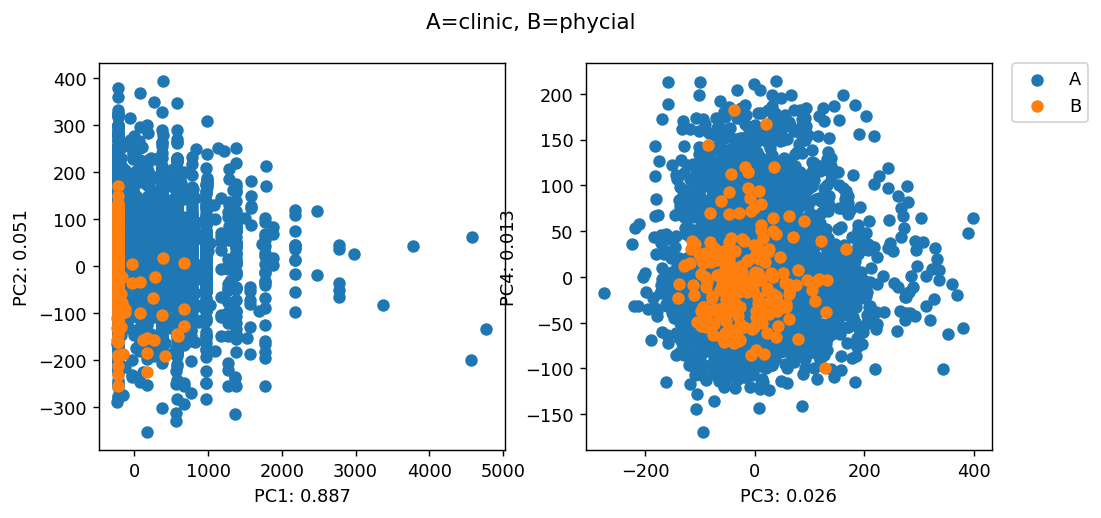

In [158]:
fig = plt.figure(dpi=128, figsize=(9, 4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.scatter(data4[data4['Origin']=='A']['PC1_remove_RDW'], data4[data4['Origin']=='A']['PC2_remove_RDW'])
ax1.scatter(data4[data4['Origin']=='B']['PC1_remove_RDW'], data4[data4['Origin']=='B']['PC2_remove_RDW'])
ax2.scatter(data4[data4['Origin']=='A']['PC3_remove_RDW'], data4[data4['Origin']=='A']['PC4_remove_RDW'])
ax2.scatter(data4[data4['Origin']=='B']['PC3_remove_RDW'], data4[data4['Origin']=='B']['PC4_remove_RDW'])

ax1.set_xlabel("PC1: %0.3f" % pca.explained_variance_ratio_[0])
ax1.set_ylabel("PC2: %0.3f" % pca.explained_variance_ratio_[1])
ax2.set_xlabel("PC3: %0.3f" % pca.explained_variance_ratio_[2])
ax2.set_ylabel("PC4: %0.3f" % pca.explained_variance_ratio_[3])

fig.suptitle('A=clinic, B=phycial')
plt.legend(['A','B'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

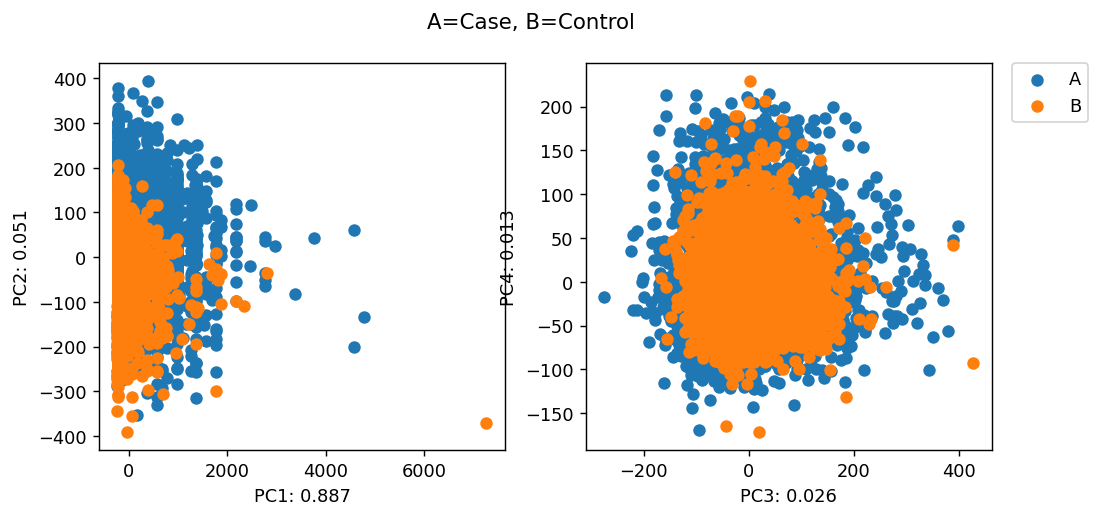

In [159]:
fig = plt.figure(dpi=128, figsize=(9, 4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.scatter(data4[data4['A=Case, B=Control']=='A']['PC1_remove_RDW'], data4[data4['A=Case, B=Control']=='A']['PC2_remove_RDW'])
ax1.scatter(data4[data4['A=Case, B=Control']=='B']['PC1_remove_RDW'], data4[data4['A=Case, B=Control']=='B']['PC2_remove_RDW'])
ax2.scatter(data4[data4['A=Case, B=Control']=='A']['PC3_remove_RDW'], data4[data4['A=Case, B=Control']=='A']['PC4_remove_RDW'])
ax2.scatter(data4[data4['A=Case, B=Control']=='B']['PC3_remove_RDW'], data4[data4['A=Case, B=Control']=='B']['PC4_remove_RDW'])

ax1.set_xlabel("PC1: %0.3f" % pca.explained_variance_ratio_[0])
ax1.set_ylabel("PC2: %0.3f" % pca.explained_variance_ratio_[1])
ax2.set_xlabel("PC3: %0.3f" % pca.explained_variance_ratio_[2])
ax2.set_ylabel("PC4: %0.3f" % pca.explained_variance_ratio_[3])

fig.suptitle('A=Case, B=Control')
plt.legend(['A','B'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

# Check the distribution

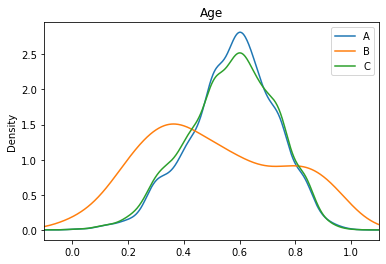

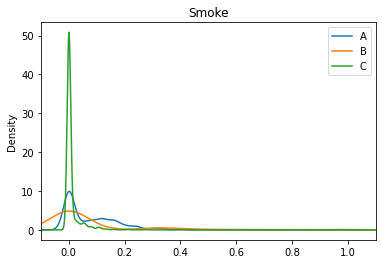

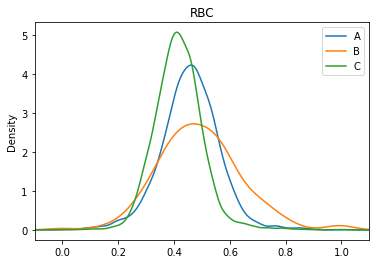

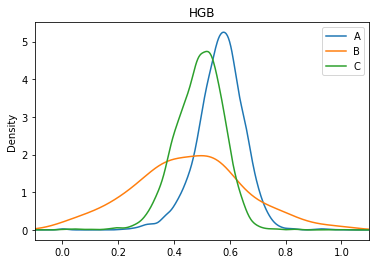

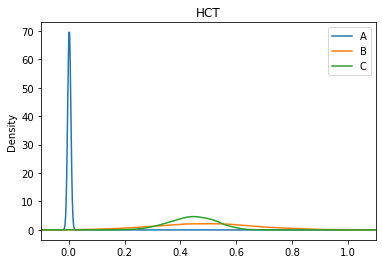

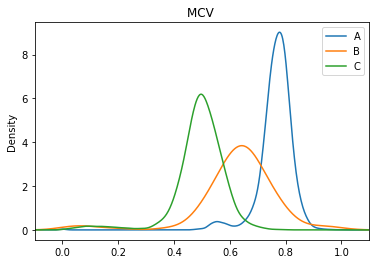

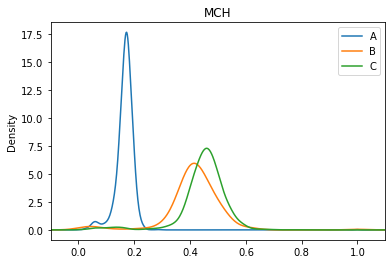

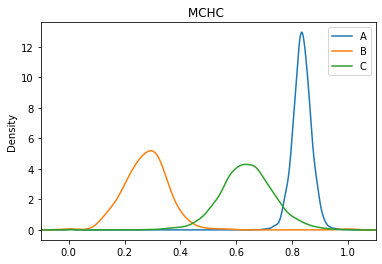

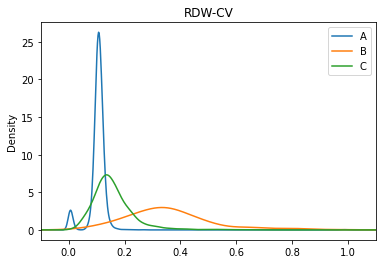

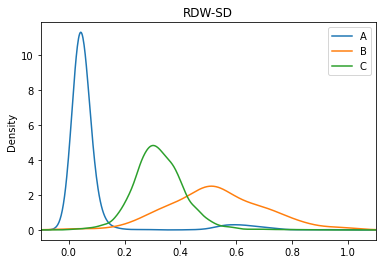

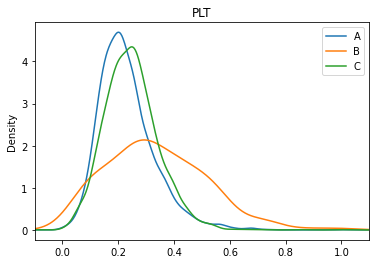

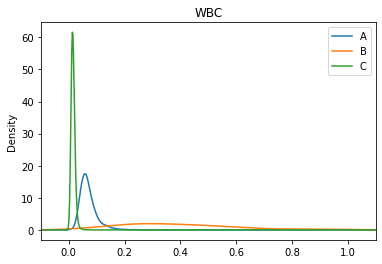

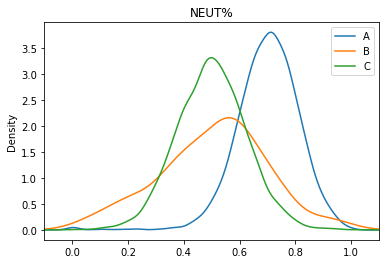

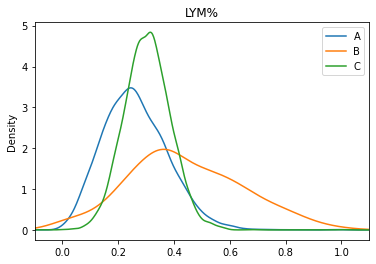

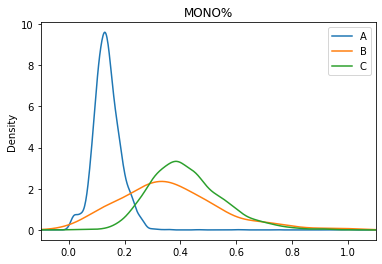

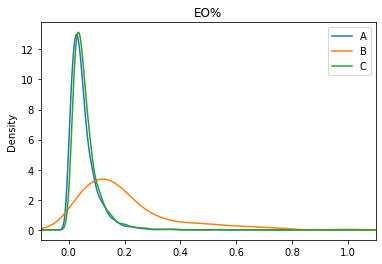

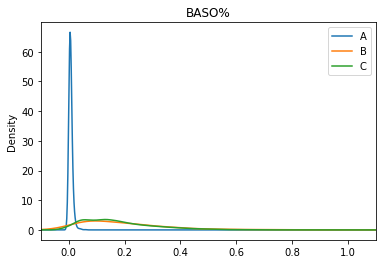

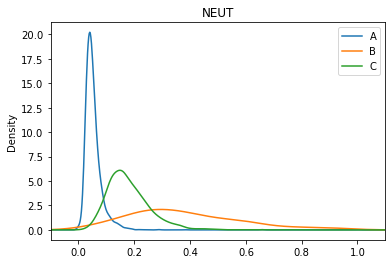

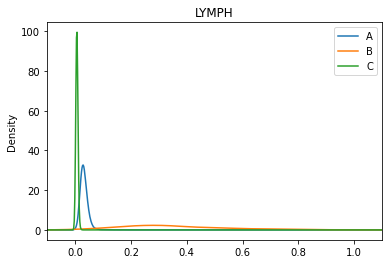

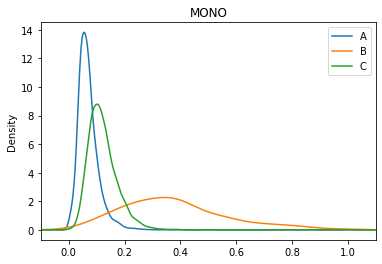

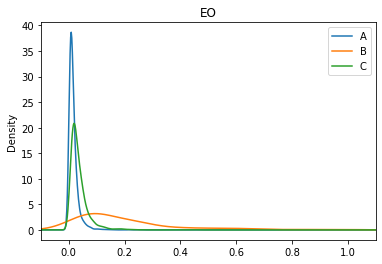

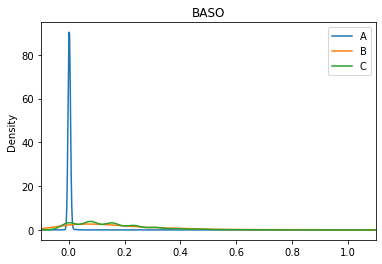

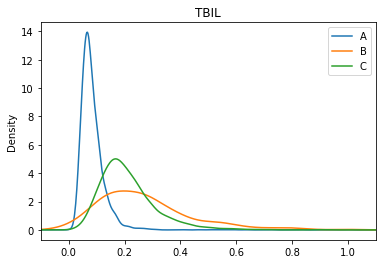

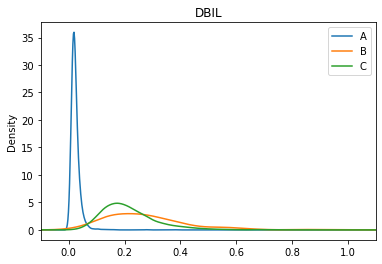

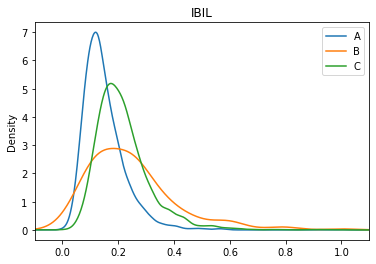

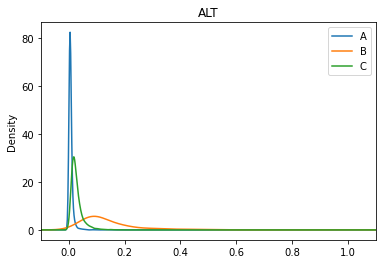

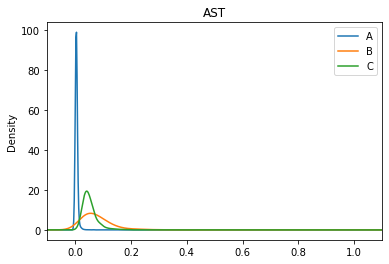

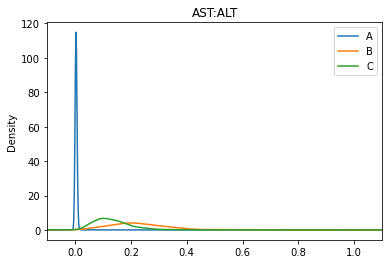

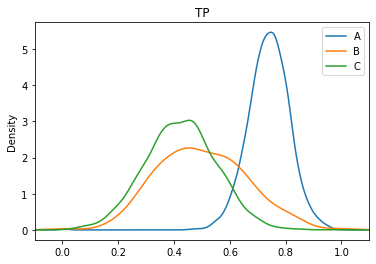

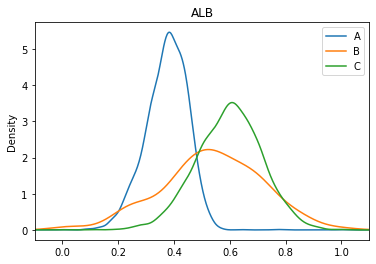

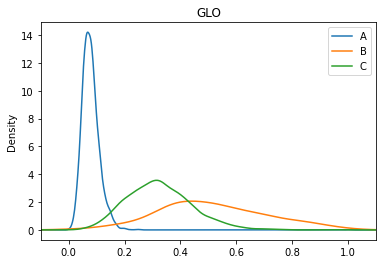

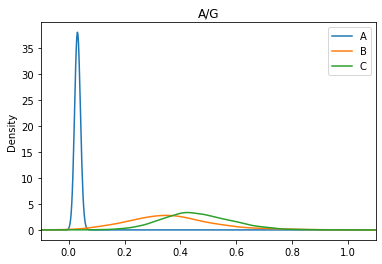

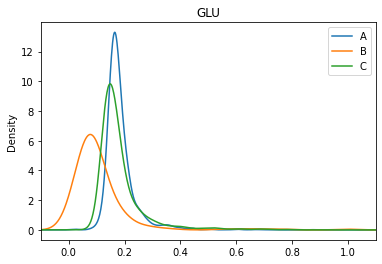

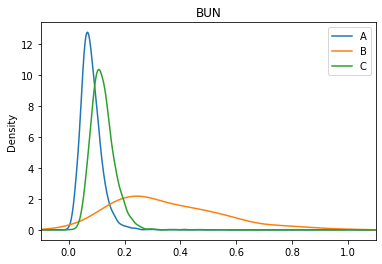

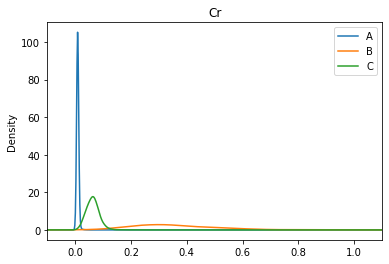

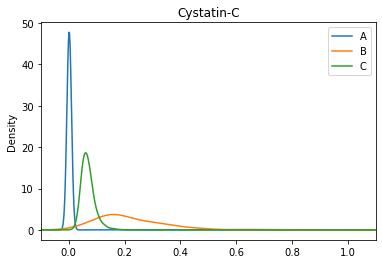

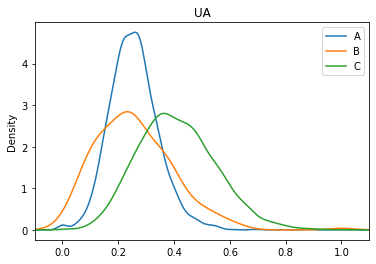

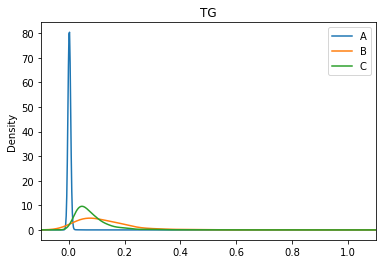

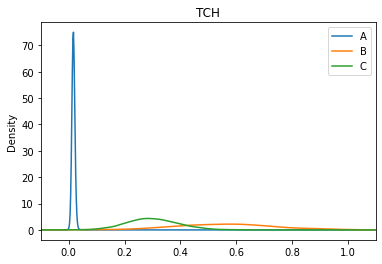

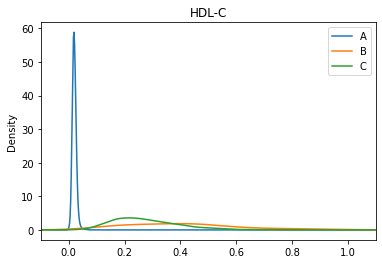

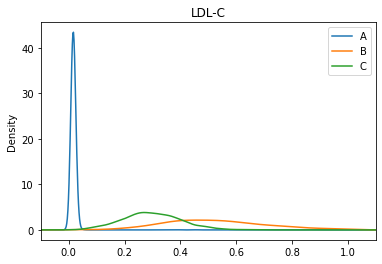

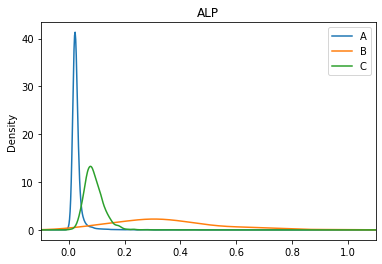

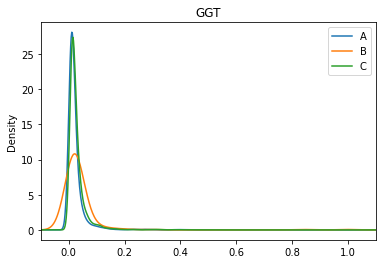

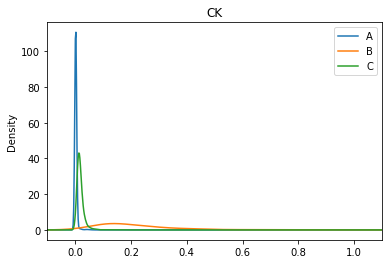

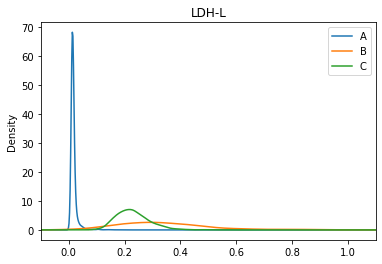

KeyboardInterrupt: 

In [17]:
for fea in data.columns[6:]:
    origin_group = data.groupby('Origin').apply(lambda x: x[fea].apply(lambda y: (y-x[fea].min())/(x[fea].max()-x[fea].min())))
#     cancer_group = data.groupby('A=Case, B=Control').apply(lambda x: x[fea].apply(lambda y: (y-x[fea].min())/(x[fea].max()-x[fea].min())))

    origin_group['A'].plot(kind='kde', label= 'A')
    origin_group['B'].plot(kind='kde', label= 'B')
    origin_group['C'].plot(kind='kde', label= 'C')
#     cancer_group['A'].plot(kind='kde', label= 'Case', marker='x')
#     cancer_group['B'].plot(kind='kde', label= 'Control', marker='x')
    plt.xlim([-0.1,1.1])
    plt.legend()
    plt.title(fea)
    plt.show()

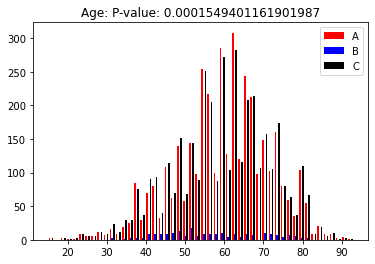

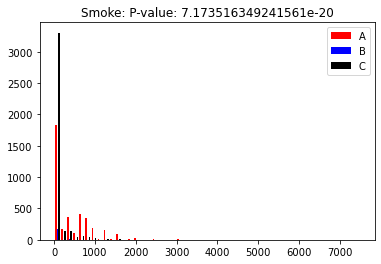

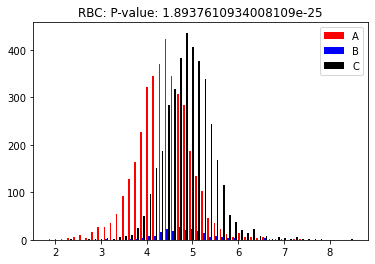

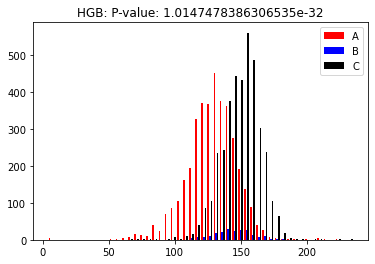

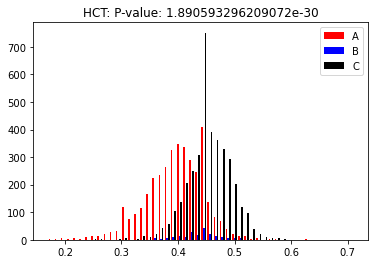

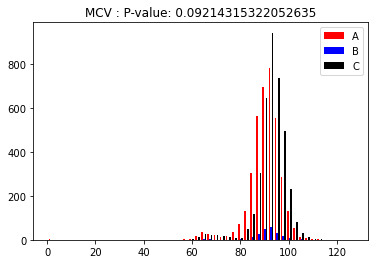

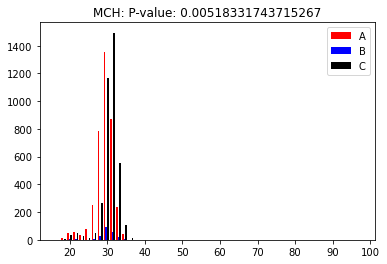

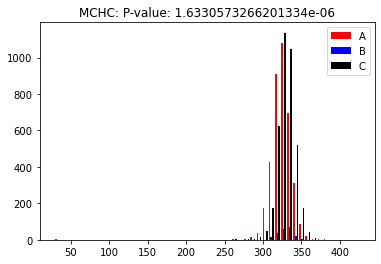

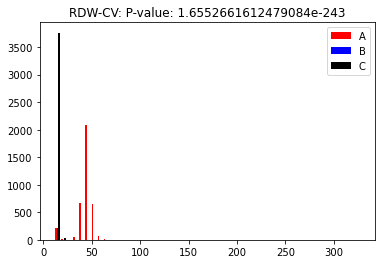

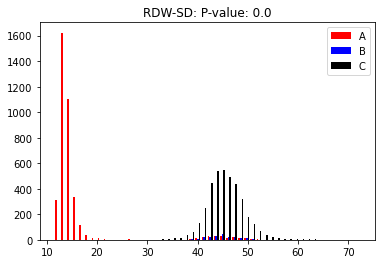

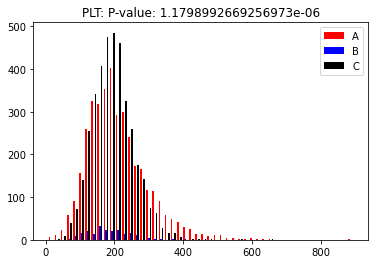

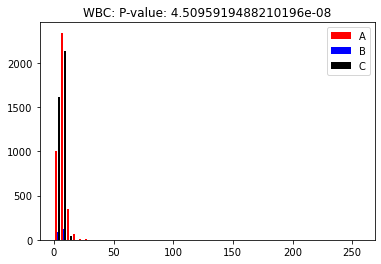

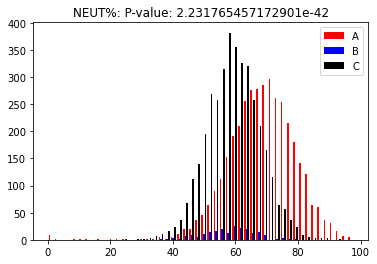

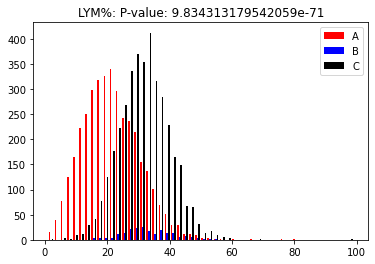

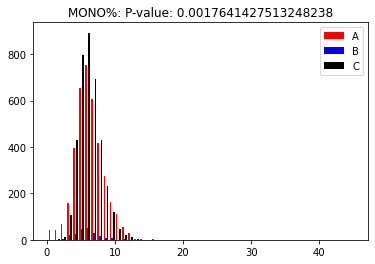

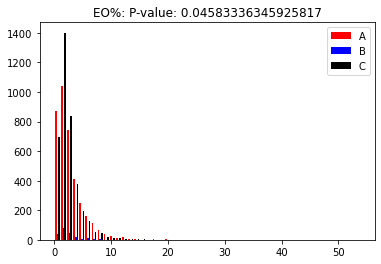

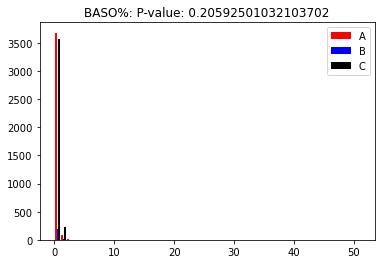

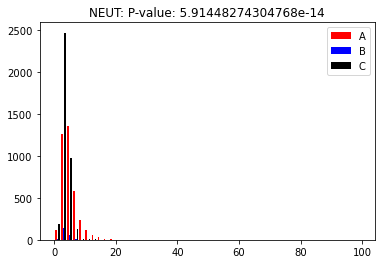

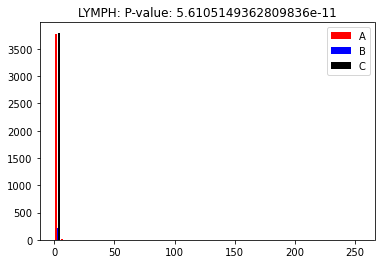

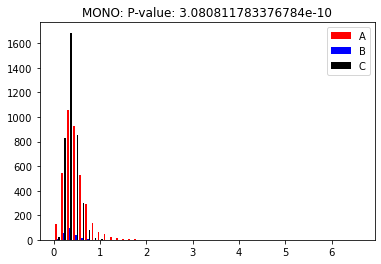

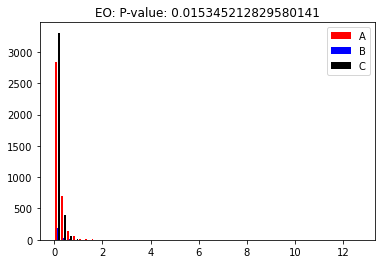

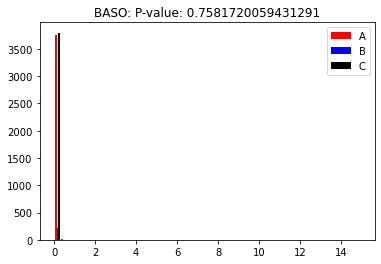

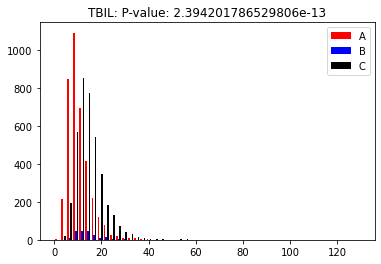

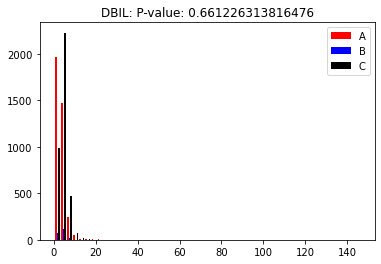

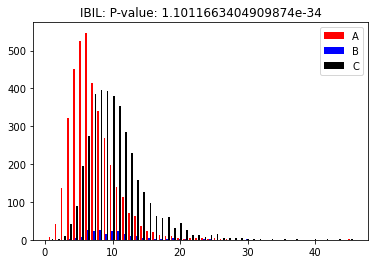

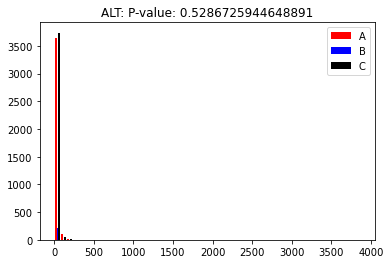

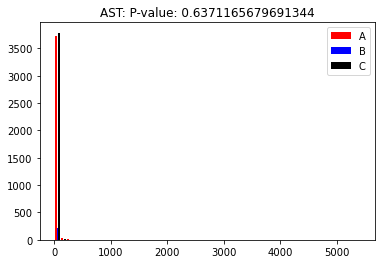

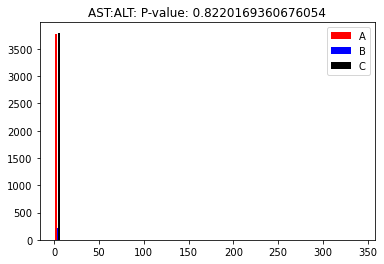

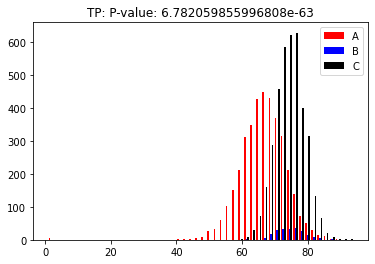

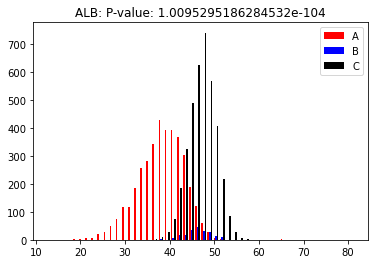

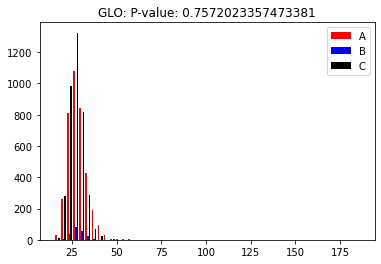

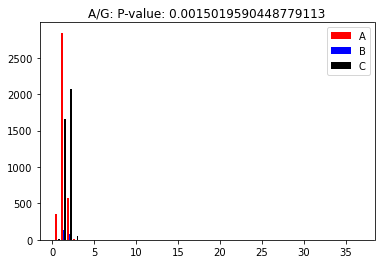

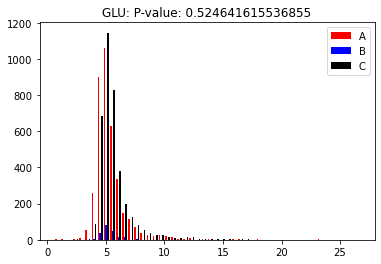

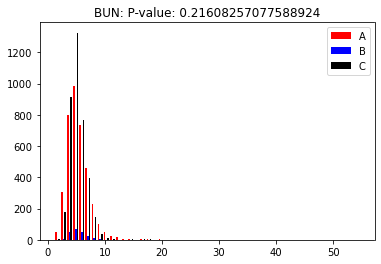

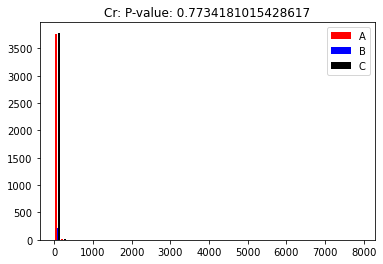

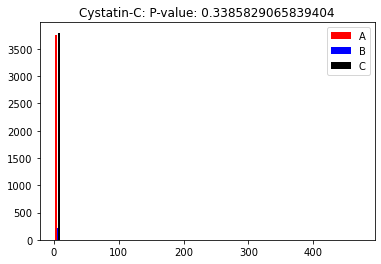

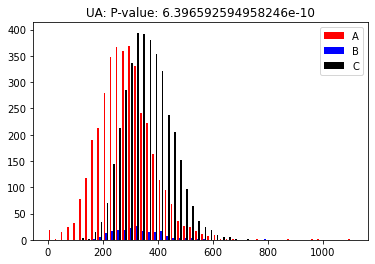

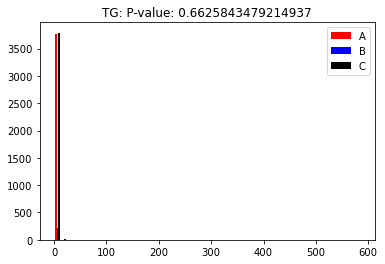

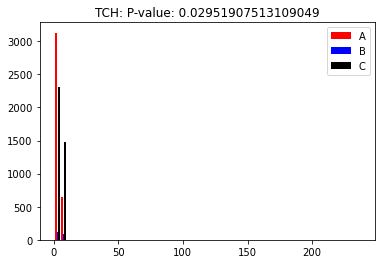

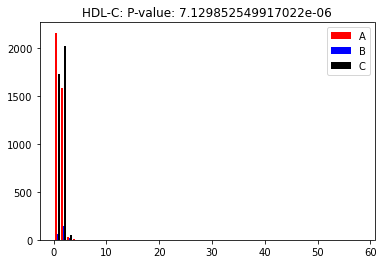

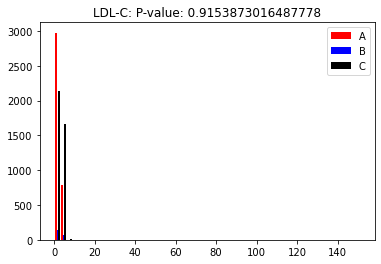

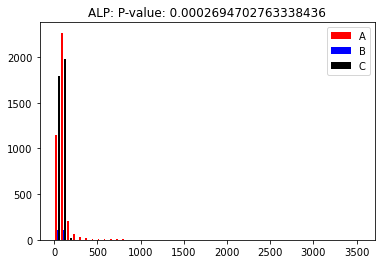

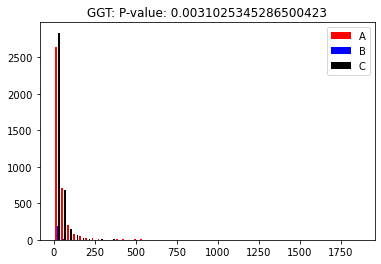

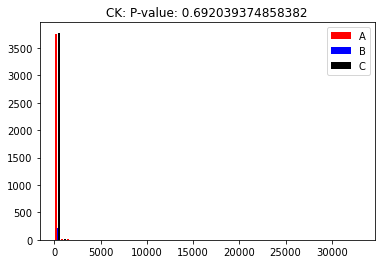

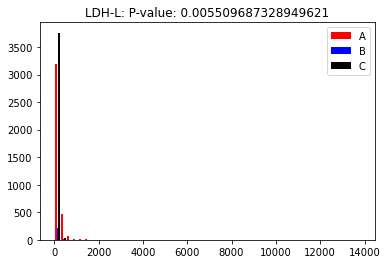

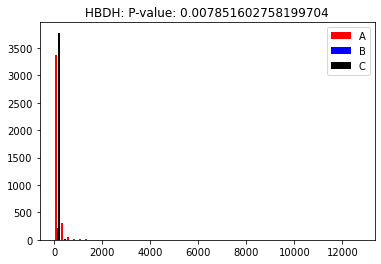

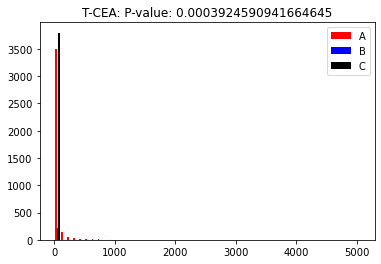

In [134]:
fea_diff =[]
for fea in data.columns[6:]:
    a = data[data['Origin']=='A'][fea].dropna()    
    b = data[data['Origin']=='B'][fea].dropna() 
    c = data[data['Origin']=='C'][fea]
    plt.hist([a,b,c], bins=50, color=['r','b','k'])
    plt.legend(['A','B','C'])
    p_val = ss.ttest_ind(a, b)[1]
    if p_val < 0.05:
        fea_diff.append(fea)
    plt.title(fea+f': P-value: {p_val}')
    plt.show()

In [136]:
fea_diff.remove('Age')
fea_diff.remove('Smoke')

# The features need to be corrected the batch effects

In [143]:
data_BE = data[data['Origin']!='C'][['ID', 'Origin']+fea_diff]
data_BE.to_csv('../../data/cancer_data_BE.csv', index=False)

In [39]:
data_BE

,ID,Origin,RBC,HGB,MCH,MCHC,RDW-CV,RDW-SD,PLT,WBC,...,ALB,A/G,UA,TCH,HDL-C,ALP,GGT,LDH-L,HBDH,T-CEA
0,1,A,3.78,122.0,32.3,334.0,47.7,13.7,126.0,4.50,...,41.1,1.88,250.0,3.86,1.99,47.0,11.0,156.0,118.0,6.96
1,100,A,5.53,169.0,30.6,328.0,46.7,13.7,326.0,31.79,...,30.8,1.47,266.0,6.60,2.49,43.0,30.0,191.0,159.0,4.15
2,1000,A,4.04,120.0,29.7,317.0,47.1,13.7,125.0,7.38,...,35.9,1.31,285.0,4.22,1.12,66.0,17.0,211.0,166.0,3.33
3,1007,A,4.14,131.0,31.6,341.0,47.8,14.0,178.0,5.56,...,44.6,1.79,270.0,3.97,1.47,58.0,13.0,227.0,173.0,0.76
4,1008,A,4.54,139.0,30.6,343.0,42.0,13.0,94.0,4.35,...,36.8,1.47,233.0,3.55,1.10,88.0,31.0,159.0,146.0,4.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,1742291,B,4.03,132.0,32.8,330.0,13.1,47.5,115.0,5.63,...,47.6,1.46,219.0,4.85,1.74,53.0,11.0,220.0,188.0,1.05
3990,1801235,B,4.32,149.0,34.5,334.0,14.3,54.3,101.0,6.42,...,42.2,1.17,436.0,4.56,1.63,76.0,35.0,184.0,148.0,2.42
3991,2175129,B,4.85,140.0,28.9,341.0,14.4,44.4,170.0,6.05,...,46.8,1.34,471.0,4.37,0.83,66.0,34.0,229.0,175.0,3.02
3992,2446951,B,5.15,160.0,31.1,338.0,13.8,46.5,165.0,5.54,...,48.7,2.40,350.0,5.77,1.65,79.0,23.0,181.0,145.0,1.55


# Using R package ```sva``` correctiong the batch effects

In [1]:
data_rmBE = pd.read_csv('../../data/cancer_data_RMBE.csv')

NameError: name 'pd' is not defined

In [91]:
data_rmBE.drop('Origin', axis=1, inplace=True)

RBC	0.9517913169186687


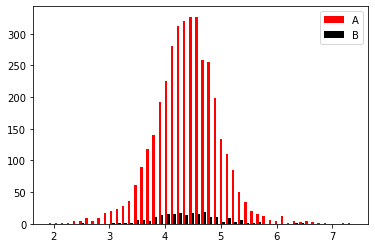

HGB	0.9458437491055256


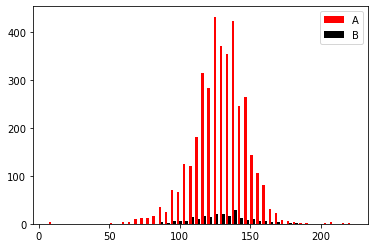

MCH	0.9983326810788228


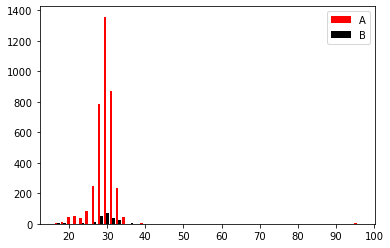

MCHC	0.9893285699674086


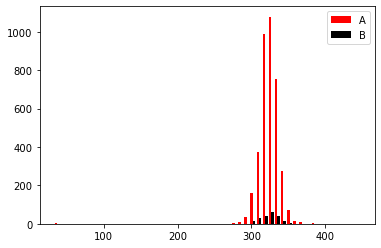

RDW.CV	0.8529939851299091


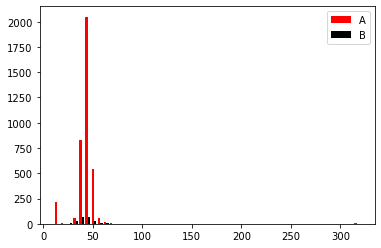

RDW.SD	0.7421399082927573


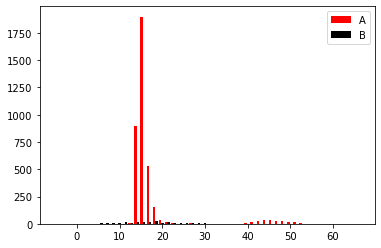

PLT	0.9545148526773303


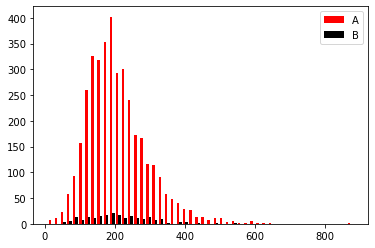

WBC	0.9601670066932917


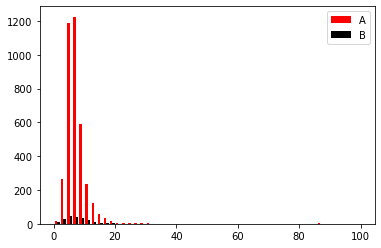

NEUT.	0.898110591643018


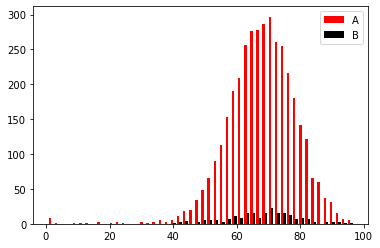

LYM.	0.9039258517671778


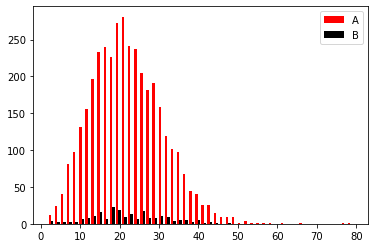

MONO.	0.9628491042573624


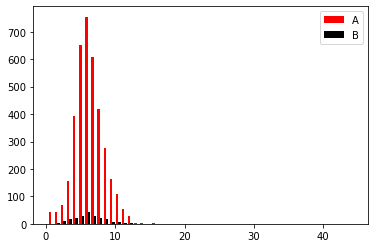

EO.	0.9712807743510044


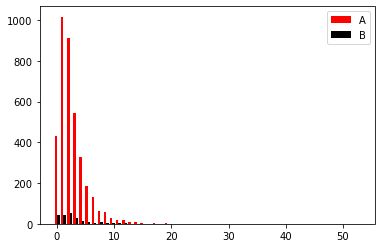

NEUT	0.9526050946873336


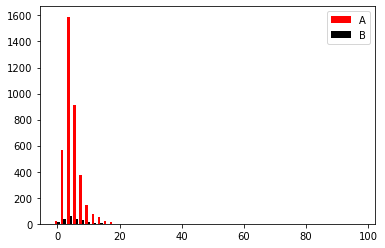

LYMPH	0.9807300214360638


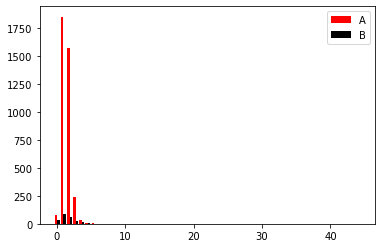

MONO	0.9533378689601689


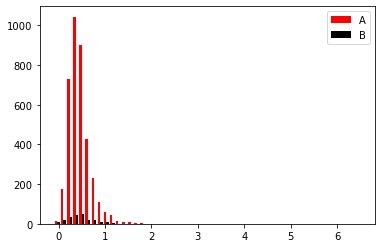

EO	0.9747532425439317


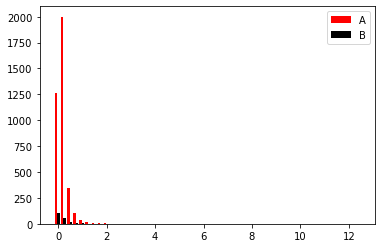

TBIL	0.972344621560531


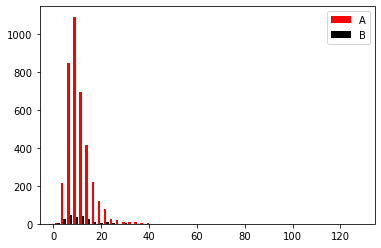

IBIL	0.9291317470885225


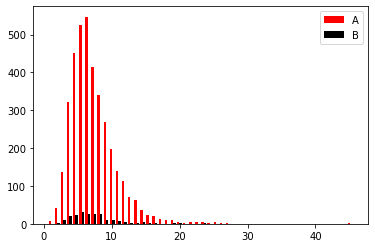

TP	0.922987965668167


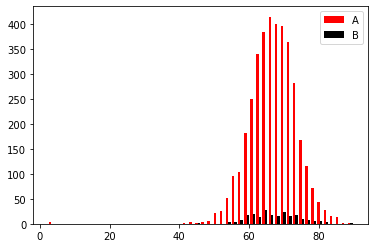

ALB	0.8971549763013317


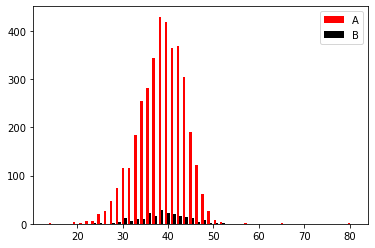

A.G	0.999533722450858


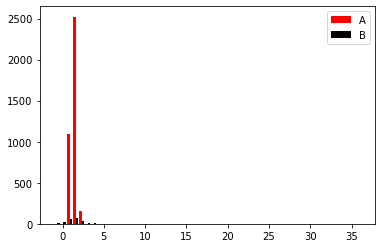

UA	0.9795035027351247


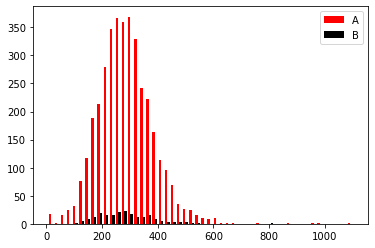

TCH	0.9963460354255159


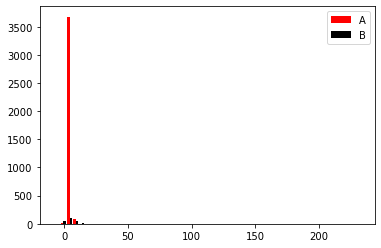

HDL.C	0.9928243123996799


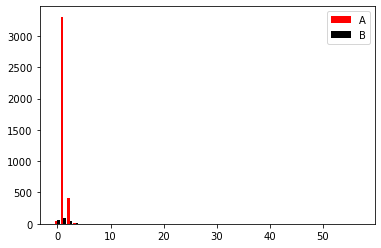

ALP	0.9726573226380462


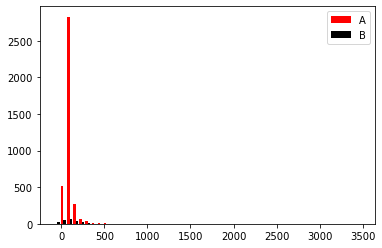

GGT	0.9669835866902388


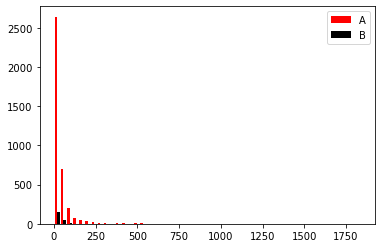

LDH.L	0.9772624785022941


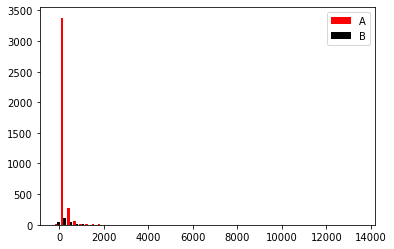

HBDH	0.977669485832778


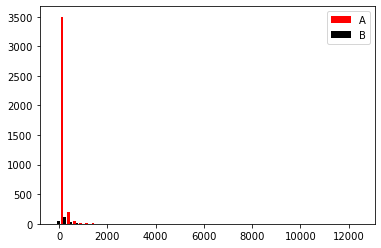

T.CEA	0.974590268721661


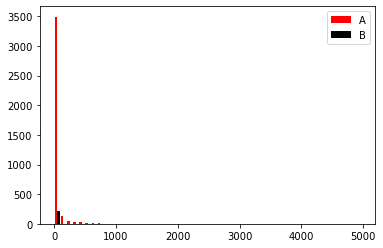

In [75]:
for fea in data_rmBE.columns[2:]:
    a = data_rmBE[data_rmBE['Origin']=='A'][fea]    
    b = data_rmBE[data_rmBE['Origin']=='B'][fea]
    plt.hist([a,b], bins=50, color=['r','k'])
    plt.legend(['A','B'])
    p_val = ss.ttest_ind(a, b)[1]
    print(fea+'\t'+str(p_val))
    plt.show()

In [131]:
c_group = data[data['Origin']=='C']

In [138]:
data_new = pd.merge(data.drop(fea_diff, axis=1)[data['Origin']!='C'], data_rmBE, on='ID')

In [139]:
data_new = pd.concat([data_new, c_group])

In [140]:
data_new

,Origin,Age_group,A=male B=female,ID,"A=Case, B=Control",Pattern,Age,Smoke,MCV,BASO%,...,A/G,UA,TCH,HDL-C,ALP,GGT,LDH-L,HBDH,T-CEA,HCT
0,A,Y,B,1,A,A,41,0.0,96.6,0.9,...,1.883463,252.636417,3.906763,1.992998,46.861479,10.767012,155.213332,117.462757,6.109310,NaN
1,A,Y,A,100,A,A,35,0.0,93.3,0.3,...,1.481749,268.435198,6.590655,2.483692,42.943544,29.440243,189.488106,157.613563,3.357670,NaN
2,A,Y,A,1000,A,A,50,0.0,93.8,0.4,...,1.324983,287.196250,4.259391,1.139190,65.471666,16.663822,209.073692,164.468579,2.554701,NaN
3,A,Y,B,1007,A,A,50,200.0,92.8,0.5,...,1.795282,272.384893,4.014511,1.482676,57.635798,12.732615,224.742160,171.323595,0.038077,NaN
4,A,Y,A,1008,A,A,51,400.0,89.2,0.2,...,1.481749,235.850213,3.603111,1.119563,87.020305,30.423045,158.151170,144.882820,3.357670,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7787,C,M,A,2489054,B,O,60,25.0,97.4,0.5,...,1.500000,425.000000,5.390000,1.350000,94.000000,49.000000,159.000000,119.000000,1.340000,0.48
7788,C,Y,A,2491728,B,O,48,0.0,95.5,0.3,...,2.270000,263.000000,5.220000,1.110000,60.000000,65.000000,164.000000,129.000000,0.970000,0.51
7789,C,M,A,2491799,B,O,56,0.0,63.1,0.2,...,1.720000,295.000000,5.910000,1.390000,124.000000,16.000000,128.000000,112.000000,1.380000,0.40
7790,C,M,B,509610,B,O,59,25.0,92.8,0.3,...,1.380000,243.000000,5.390000,1.830000,71.000000,28.000000,273.000000,232.000000,3.880000,0.47


In [142]:
data_new.to_csv('../../data/cancer_data_v4.csv', index=False)